# Homework 2: Monte Carlo simulation 
Using a Monte Carlo simulation approach, we will model variability in an industrial system filling containers with a fluid. Let’s say there is a factory filling 10,000 containers (150 mL each) per day with ethylene glycol. To fill the containers, nozzles open to release ethylene glycol from a reservoir such that the volume released into a 150 mL container is modeled by:

Volume = time the nozzle is open x nozzle area x fluid viscosity

Or more mathematically:
$ V = t*A*32.7e^{\frac{T}{320}} $

Where:

$t$ = the time the nozzle is open (seconds)

$A$ = nozzle area (cm^2)

$T$ = room temperature (celsius)

### 1. Using this equation, set t=3.45 seconds, T= 21°C, and A=1.2 cm^2 and calculate the deterministic (expected) volume (mL of ethylene glycol) that will be released into each 150 mL container.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# The function is designed to process and decide how many repetitions of volume calculation are needed
# This function then creates a time variable with the tolerance allowed in the prompt
# After the function either returns all the data as an array, or just the one value

def volume_finder(repetitions):
   
    if repetitions == 1:
        time_tolerance = np.random.randint(-5, 5) / 50
        time_passed = 3.45 # seconds
        time = time_passed + time_tolerance
        temperature = 21 # Celsius
        area = 1.2 # cm^2
        viscosity = 32.7 * np.exp( ( temperature / 320 ) )

        volume = time * area * viscosity
        volume = np.round(volume, 2)
        
        return volume 
    
    elif repetitions > 1:
        time_tolerances = np.random.randint(-5, 5, size=repetitions) / 50
        time_passed = 3.45 # seconds
        times = time_passed + time_tolerances
        temperature = 21 # Celsius
        area = 1.2 # cm^2
        viscosity = 32.7 * np.exp( ( temperature / 320 ) )

        volumes =  times * area * viscosity
        volumes = np.round(volumes, 5)
        return volumes
    
    else:
        print('The input was not able to be processed.')
        return None 


volume_finder(1)

np.float64(142.88)

### 2. The nozzle manufacturer says there is a timing tolerance of up to ±0.05 seconds, which may be longer with old or well-used equipment. Using the np.random.randn(), simulate this temporal uncertainty to the timing variable, t, and calculate one potential volume outcome.

In [3]:
time_tolerance = np.random.randint(-5, 5) / 50
time_passed = 3.45 # seconds
time = time_passed + time_tolerance
temperature = 21 # Celsius
area = 1.2 # cm^2
viscosity = 32.7 * np.exp( ( temperature / 320 ) )

volume = time * area * viscosity
volume = np.round(volume, 2)
print(volume) 

146.24


### 3.  Repeat the calculations for 10,000 containers and make a histogram of the outcomes.

In [4]:
def input_fetcher(prompt):
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value
            else:
                print('Please enter a positive integer.')
        except ValueError:
            print('Invalid input. Please enter a valid integer.')

#value = input_fetcher('\nHow many datapoints would you like? ')
value = 10000


value_data = volume_finder(value)

print(f'Data successfully acquired, moving to graphing phase.')

# This function makes the histogram, and also spits out the mean and std dev
def histogram_maker(data):
    
    # This defines details of the plot itself
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.9)
    plt.title('Histogram of Volume Outcomes', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Volume (mL)', fontsize=14)
    plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)
    
    # This gets the mean and std, then it uses those to add them to the histogram
    # This took longer than it was worth
    mean_value = np.mean(data)
    std_dev_value = np.std(data)
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_dev_value, color='green', linestyle='dashed', linewidth=1.5, label=f'+1 Std Dev: {mean_value + std_dev_value:.2f}')
    plt.axvline(mean_value - std_dev_value, color='green', linestyle='dashed', linewidth=1.5, label=f'-1 Std Dev: {mean_value - std_dev_value:.2f}')
    
    # Grabbing range because we need that also later
    range_value = np.max(data) - np.min(data)
    
    # Accounting for overflow
    overflow_count = np.sum(data > 150)
    plt.text(0.95, 0.95, f'Over 150: {overflow_count}', transform=plt.gca().transAxes,
             fontsize=12, color='black', ha='right', va='top', bbox=dict(facecolor='white', alpha=0.7))

    
    # A legend
    plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.8, -0.1), ncol=3)
    
    plt.tight_layout()
    plt.show()
    
    # Rounding the values so they arent awful
    mean_value = np.round(mean_value, 2)
    std_dev_value = np.round(std_dev_value, 2)
    range_value = np.round(range_value, 2)
    
    
    # The bonus of data we need later
    return mean_value, std_dev_value, range_value, overflow_count

# histogram_maker(value_data)
    

Data successfully acquired, moving to graphing phase.


### 3a. Calculate the mean, standard deviation, and range of the 10,000 outcomes. Based on these findings, would you trust purchasing a container from this factory? Support your answer.

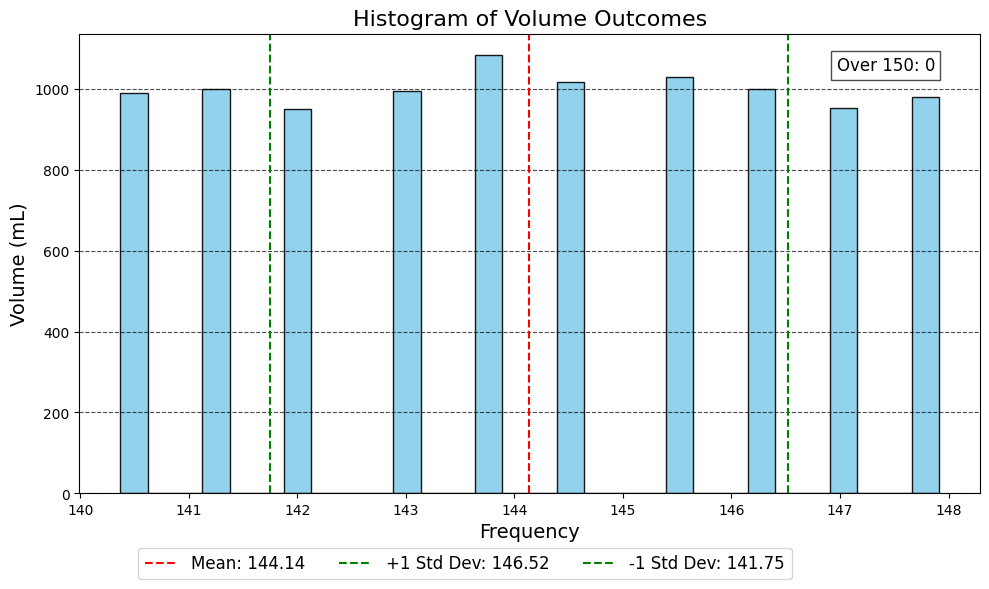


The mean is: 144.14 mL.

The standard deviation is: 2.39 mL.

The range is: 7.54 mL.
There were 0 bottles filled about 150 mL.
This translates to a 0% chance for bottles to overfill.


In [5]:
mean, std_dev, range, overflow_count = histogram_maker(value_data)

print(f'\nThe mean is: {mean} mL.')
print(f'\nThe standard deviation is: {std_dev} mL.')
print(f'\nThe range is: {range} mL.')
print(f'There were {overflow_count} bottles filled about 150 mL.')
print(f'This translates to a {overflow_count}% chance for bottles to overfill.')

# Prompt answer:
# I would be fine purchasing from this factory. While they seem to never hit
# the advertised 150 mL, I don't know that I care all that much about 6 mL. 
# Granted, they are false advertising, which is bad, but I just don't think
# 6 mL is all that big of a deal. Unless I had to buy in BULK. Then the 6 mL
# deficeits would start to add up fast. 

# Updated answer. I was suspicious of the consistent scam of about 6 mL. 
# To ease my suspicious, I changed my time tolerance, which was originally the
# provided 0.05 to 0.1 in order to account for the factory's 'old' equipment.
# It is still kind of a scam. Bruh. 

### 3b. Using the results from 3a, calculate the cumulative probability of releasing a volume exceeding (i.e. overfilling) the 150 mL container. Does that level of overfilled containers seem acceptable for a profitable business?

I found that there were literally no overfilled bottles in the 10000 set.
This is definitely a profitable model, as it is basically a scam.

### 4. Engineering tolerances aren’t the only factor to consider in complex systems. In this case, fluid viscosity (and thus the volume released in a given time) is affected by temperature. It is common for a factory room to heat up by several degrees due to motorized equipment running for multiple hours. In addition to the nozzle timing uncertainty, add a thermal uncertainty of ±4°C to the room temperature variable, T.


In [ ]:

def volume_finder2(repetitions):
   
    if repetitions == 1:
        time_tolerance = np.random.randint(-5, 5) / 100
        time_passed = 3.45 # seconds
        time = time_passed + time_tolerance
        temperature = 21 +  np.random.randint(-4,4)# Celsius
        area = 1.2 # cm^2
        viscosity = 32.7 * np.exp( ( temperature / 320 ) )

        volume = time * area * viscosity
        volume = np.round(volume, 2)
        
        return volume 
    
    elif repetitions > 1:
        time_tolerances = np.random.randint(-5, 5, size=repetitions) / 100
        time_passed = 3.45 # seconds
        times = time_passed + time_tolerances
        temperature = 21 # Celsius
        area = 1.2 # cm^2
        viscosity = 32.7 * np.exp( ( temperature / 320 ) )

        volumes =  times * area * viscosity
        volumes = np.round(volumes, 5)
        return volumes
    
    else:
        print('The input was not able to be processed.')
        return None 

### 4a. Calculate the volumes for 10,000 outcomes and make a histogram.

In [ ]:

def input_fetcher(prompt):
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value
            else:
                print('Please enter a positive integer.')
        except ValueError:
            print('Invalid input. Please enter a valid integer.')

value = 10000

value_data = volume_finder2(value)

print(f'Data successfully acquired, moving to graphing phase.')

# This function makes the histogram, and also spits out the mean and std dev
def histogram_maker2(data):
    
    # This defines details of the plot itself
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.9)
    plt.title('Histogram of Volume Outcomes', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Volume (mL)', fontsize=14)
    plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)
    
    # This gets the mean and std, then it uses those to add them to the histogram
    # This took longer than it was worth
    mean_value = np.mean(data)
    std_dev_value = np.std(data)
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_dev_value, color='green', linestyle='dashed', linewidth=1.5, label=f'+1 Std Dev: {mean_value + std_dev_value:.2f}')
    plt.axvline(mean_value - std_dev_value, color='green', linestyle='dashed', linewidth=1.5, label=f'-1 Std Dev: {mean_value - std_dev_value:.2f}')
    
    # Grabbing range because we need that also later
    range_value = np.max(data) - np.min(data)
    
    # Accounting for overflow
    overflow_count = np.sum(data > 150)
    plt.text(0.95, 0.95, f'Over 150: {overflow_count}', transform=plt.gca().transAxes,
             fontsize=12, color='black', ha='right', va='top', bbox=dict(facecolor='white', alpha=0.7))

    
    # A legend
    plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.8, -0.1), ncol=3)
    
    plt.tight_layout()
    plt.show()
    
    # Rounding the values so they arent awful
    mean_value = np.round(mean_value, 2)
    std_dev_value = np.round(std_dev_value, 2)
    range_value = np.round(range_value, 2)
    
    
    # The bonus of data we need later
    return mean_value, std_dev_value, range_value, overflow_count

# histogram_maker(value_data)
    

Data successfully acquired, moving to graphing phase.


### 4b. Calculate the mean, standard deviation, and range of the 10,000 outcomes. Based on these findings, would you change your opinion from 3a? Support your answer.

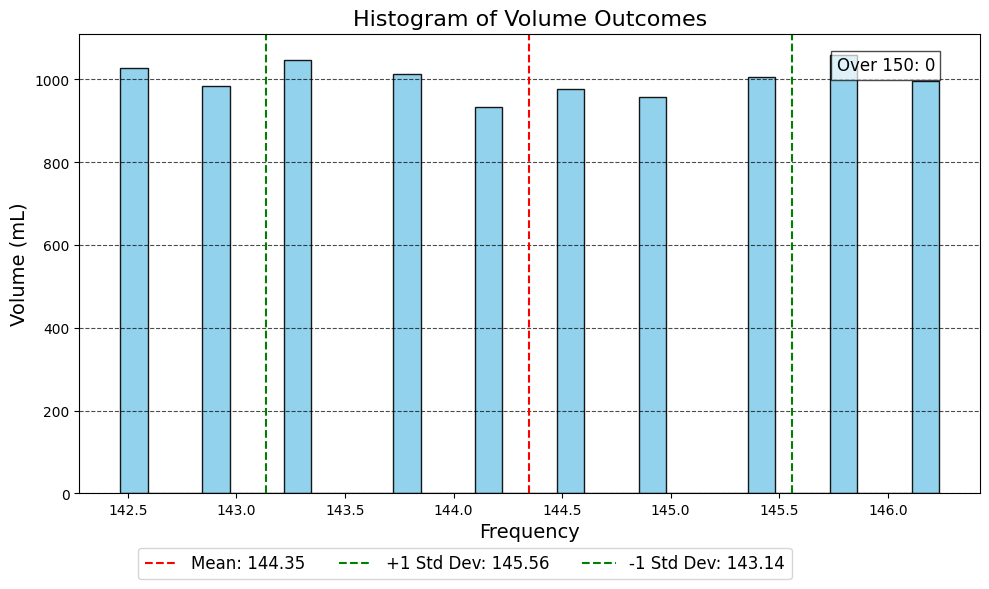


The mean is: 144.14 mL.

The standard deviation is: 2.39 mL.

The range is: 7.54 mL.
There were 0 bottles filled about 150 mL.
This translates to a 0% chance for bottles to overfill.


In [8]:
mean_value, std_dev_value, range_value, overflow_count = histogram_maker2(value_data)
print(f'\nThe mean is: {mean} mL.')
print(f'\nThe standard deviation is: {std_dev} mL.')
print(f'\nThe range is: {range} mL.')
print(f'There were {overflow_count} bottles filled about 150 mL.')
print(f'This translates to a {overflow_count}% chance for bottles to overfill.')

## 4c. Using the results from 4b, calculate the cumulative probability of overfilling a 150 mL container.

There is legit no chance of a bottle overfilling. My code kept saying that and so I did the calculations with max variation by hand. It cannot happen. The only way for it to overfill is with a timing tolerance in excess of 0.13 seconds. But the equipment is not supposed to be that shitty, so I am saying it isn't possible. 

### 4d. Calculate the cumulative probability of UNDERfilling a container by 5% of the deterministic volume from question 1.

In [ ]:
# Deterministic volume calculation
t = 3.45
A = 1.2
T = 21
deterministic_volume = t * A * 32.7 * np.exp(T / 320)
deterministic_volume = np.round(deterministic_volume, 5)
print("Deterministic volume:", deterministic_volume)

# 5% underfill threshold
underfill_threshold = deterministic_volume * 0.95


underfilled_count = np.sum(value_data < underfill_threshold)
prob_underfilled = underfilled_count / len(value_data)
print(f"Cumulative probability of underfilling by 5%: {prob_underfilled:.4f}")

Deterministic volume: 144.56018
Cumulative probability of underfilling by 5%: 0.0000


### 4e. Calculate the cumulative probability of filling a container within 1mL of the deterministic volume. 

In [10]:
# Within 1 mL of deterministic volume
within_1ml_count = np.sum(np.abs(value_data - deterministic_volume) <= 1)
prob_within_1ml = within_1ml_count / len(value_data)
print(f"Cumulative probability of filling within 1 mL: {prob_within_1ml:.4f}")

Cumulative probability of filling within 1 mL: 0.4886


### Extra Credit: How many containers would be overfilled with both the temporal and thermal uncertainty conditions? If each overfilled container cost the company 1.25USD in lost product and cleaning time and it would cost 250kUSD to insulate the equipment. Would it be profitable to insulate the equipment over one year? Over another time period? Recall, the company produces 10k containers per day.

The containers cannot overfill. The company will lose no revenue to spills or overfilling. The only way for the containers to overfill is if their timings get to the point that they are barely functional anymore, but at that point you could easily pay for some basic maintenance or just adjust parameters slightly more to solve the issue. 